<a href="https://colab.research.google.com/github/Galiishaq/uni_project/blob/main/richards_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/500
8/8 [==============================] - 1s 32ms/step - loss: 3000.4004 - mean_absolute_error: 53.8341 - val_loss: 2988.6348 - val_mean_absolute_error: 53.3868
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 2984.8423 - mean_absolute_error: 53.6903 - val_loss: 2972.4736 - val_mean_absolute_error: 53.2328
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 2967.1760 - mean_absolute_error: 53.5266 - val_loss: 2951.9741 - val_mean_absolute_error: 53.0359
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 2944.6384 - mean_absolute_error: 53.3166 - val_loss: 2926.1082 - val_mean_absolute_error: 52.7870
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 2915.6755 - mean_absolute_error: 53.0456 - val_loss: 2893.5706 - val_mean_absolute_error: 52.4720
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 2879.0872 - mean_absolute_error: 52.7032 - val_loss: 2852.7532 - val_mean_absolute_

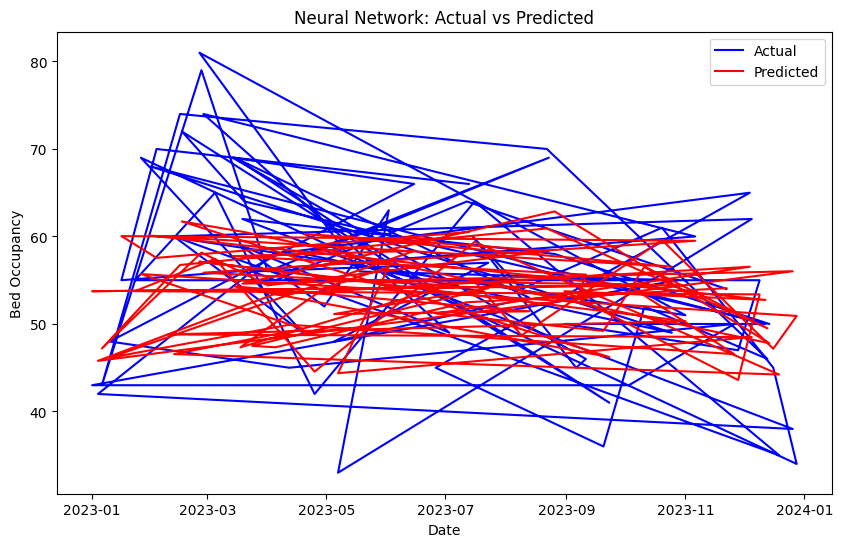

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# Assuming trainData and testData are pandas DataFrames
# with columns 'ADMISSION', 'DISCHARGE', and 'BED_OCCUPANCY'
file_path = '/content/MY OWN.xlsx'
data = pd.read_excel(file_path)

# X = data[['ADMISSION', 'DISCHARGE']].values
# y = data['BED_OCCUPANCY'].values

trainData, testData = train_test_split(data, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
trainData_scaled = scaler.fit_transform(trainData[['ADMISSION', 'DISCHARGE']])
testData_scaled = scaler.transform(testData[['ADMISSION', 'DISCHARGE']])


# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(),
    metrics=['mean_absolute_error']
)

# Fit the model
history = model.fit(
    trainData_scaled,
    trainData['BED_OCCUPANCY'],
    epochs=500,
    batch_size=32,
    validation_split=0.2
)

# Predictions
b

3/3 [==============================] - 0s 3ms/step
RMSE for Neural Network:  8.8905637416103


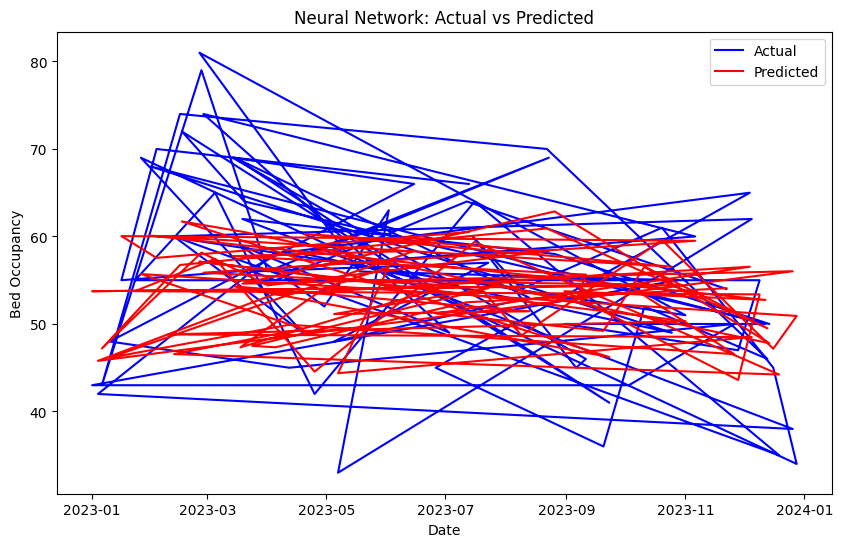

In [7]:
nn_predictions = model.predict(testData_scaled)

# Evaluate model performance
nn_RMSE = np.sqrt(mean_squared_error(testData['BED_OCCUPANCY'], nn_predictions))
print("RMSE for Neural Network: ", nn_RMSE)

# Plotting predictions vs actuals
plt.figure(figsize=(10, 6))
plt.plot(testData['DATE'], testData['BED_OCCUPANCY'], color='blue', label='Actual')
plt.plot(testData['DATE'], nn_predictions, color='red', label='Predicted')
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Bed Occupancy')
plt.legend()
plt.show()